
# ***Crear una RNA***


# **Generación y Visualización de los datos:**

In [30]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [36]:
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(500, 2)
(350, 2)
(150, 2)


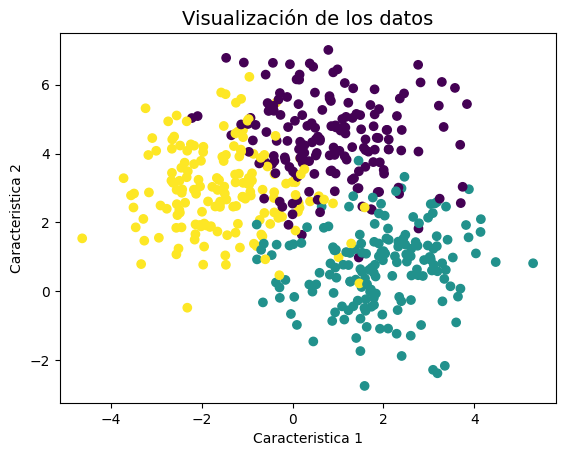

In [37]:
plt.title('Visualización de los datos', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,0], X[:,1], c=y);

# **Creación del Modelo:**

In [58]:
model = MLPClassifier(max_iter = 1000, random_state = 42, activation='relu')

# parametros
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (5, 5), (10,10), (15,15), (5, 5, 5), (10,10,10), (15,15,15)],
}

cv = 5 # numero de kfolds
grid_search = GridSearchCV(model, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (5, 5),
                                                (10, 10), (15, 15), (5, 5, 5),
                                                (10, 10, 10), (15, 15, 15)]})

In [59]:
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor score: ", grid_search.best_score_)

Mejores parámetros encontrados:  {'hidden_layer_sizes': (10,)}
Mejor score:  0.8828571428571429


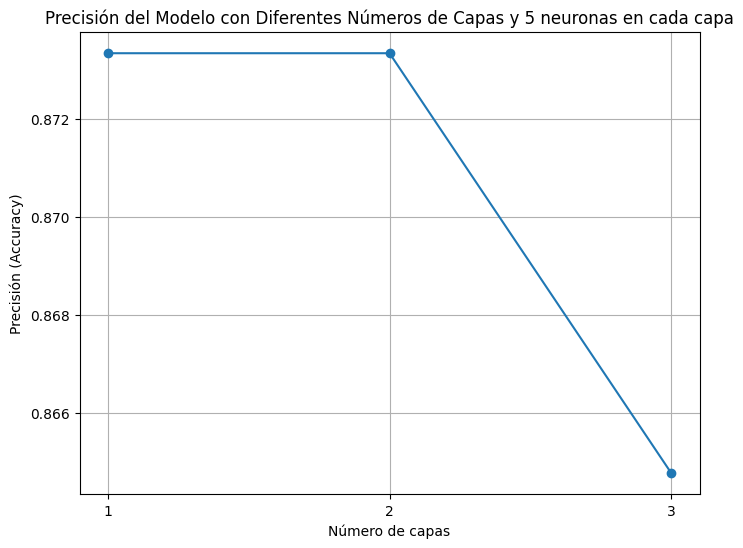

In [60]:
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Obtener los valores para el número de capas y precisión
layer_sizes = [len(param['hidden_layer_sizes']) for param in params]

# Crear un diccionario para almacenar la precisión media por número de capas
accuracy_by_layers = {}

for layers, score in zip(layer_sizes, mean_scores):
    # Si las capas ya existen en el diccionario, se agrega el score, si no, se crea la lista.
    if layers in accuracy_by_layers:
        accuracy_by_layers[layers].append(score)
    else:
        accuracy_by_layers[layers] = [score]

# Calcular la precisión media por número de capas
mean_accuracy_by_layers = {layers: sum(scores) / len(scores) for layers, scores in accuracy_by_layers.items()}

# Organizar los resultados para graficar
layer_sizes, accuracies = zip(*mean_accuracy_by_layers.items())

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(layer_sizes, accuracies, marker='o')
plt.title('Precisión del Modelo con Diferentes Números de Capas y 5 neuronas en cada capa')
plt.xlabel('Número de capas')
plt.ylabel('Precisión (Accuracy)')
plt.xticks(list(mean_accuracy_by_layers.keys()))  # Asegurar que se muestren todos los valores del eje x
plt.grid(True)
plt.show()

In [61]:
results

{'mean_fit_time': array([0.6004106 , 0.45836945, 0.32237201, 0.603931  , 0.3613306 ,
        0.41176496, 0.68631868, 0.50711288, 0.49089351]),
 'std_fit_time': array([0.12196489, 0.0878059 , 0.01869654, 0.04807724, 0.03489553,
        0.01402977, 0.20948981, 0.1245233 , 0.15119871]),
 'mean_score_time': array([0.00092316, 0.0010149 , 0.00080457, 0.00083032, 0.00098877,
        0.00082841, 0.00101433, 0.00084515, 0.00082664]),
 'std_score_time': array([1.39990246e-04, 1.64328725e-04, 2.33351263e-05, 3.61688450e-05,
        2.22101125e-04, 1.93425512e-05, 1.53094702e-04, 5.19263186e-05,
        1.54787834e-05]),
 'param_hidden_layer_sizes': masked_array(data=[(5,), (10,), (15,), (5, 5), (10, 10), (15, 15),
                    (5, 5, 5), (10, 10, 10), (15, 15, 15)],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (5,)},
  {'hidden_layer_sizes': (10

In [65]:
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Obtener el número de capas para cada configuración
layer_sizes = [len(param['hidden_layer_sizes']) if isinstance(param['hidden_layer_sizes'], tuple) else 1 for param in params]

# Crear un DataFrame de Pandas con los resultados
results_df = pd.DataFrame({
    'Número de Capas': layer_sizes,
    'Precisión Media': mean_scores
})

# Mostrar la tabla ordenada por el número de capas
results_df = results_df.sort_values('Número de Capas')
print(results_df)

   Número de Capas  Precisión Media
0                1         0.860000
1                1         0.882857
2                1         0.877143
3                2         0.874286
4                2         0.874286
5                2         0.871429
6                3         0.871429
7                3         0.862857
8                3         0.860000


In [45]:
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)